<h1 style="font-size: 48px">Trabajo Final Ciencia de Datos</h1>

## Integrantes
* José Pedro Algorta  
* Matías Britos  
* Martín Hounie 
* Agustín Terra
* Santiago Zito  

## Objetivo

Estudiar las variables de entrada para predecir cuales afectan en mayor medida si los clientes realizarán o no un depósito a plazo fijo de un año.

### Variables de entrada
#### Datos del cliente:

1. age: edad  
2. job: tipo de trabajo  
3. marital: estado civil 
4. education: nivel educativo 
5. default: ¿tiene crédito en mora? 
6. housing: ¿tiene préstamo para vivienda? 
7. loan: ¿tiene préstamo personal? 

#### Relacionado con el último contacto de la campaña actual:
8. contact: tipo de contacto 
9. month: último mes de contacto del año 
10. day_of_week: último día de contacto de la semana 
11. duration: duración último contacto, en segundos 

#### Otros atributos:
12. campaign: número de contactos realizados durante esta campaña y para este cliente 
13. pdays: número de días que pasaron desde la última vez que se contactó con el cliente desde una campaña anterior 
14. previous: número de contactos realizados antes de esta campaña y para este cliente 
15. poutcome: resultado de la campaña de marketing anterior 

#### Atributos del contexto social y económico
16. emp.var.rate: tasa de variación del empleo - indicador trimestral 
17. cons.price.idx: índice de precios al consumidor - indicador mensual 
18. cons.conf.idx: índice de confianza del consumidor - indicador mensual 
19. euribor3m: euribor a 3 meses - indicador diario
20. nr.employed: número de empleados – indicador trimestral 

### Variable de salida (objetivo deseado):
21. y - ¿El cliente ha suscrito un depósito a plazo? 


# Importar librerias y cargar los datos

In [7]:
# Librerias a importar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import itertools

from sklearn import linear_model, metrics, model_selection, preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV

In [8]:
df = pd.read_csv('data.csv')

# Información General de los datos

In [9]:
df.head(10).iloc[:,:-1]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,31,admin.,single,university.degree,no,no,no,cellular,jul,tue,555,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1
1,39,blue-collar,single,basic.4y,unknown,unknown,unknown,telephone,may,wed,64,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,70,retired,married,basic.4y,no,yes,no,cellular,oct,mon,131,1,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5
3,37,admin.,single,university.degree,no,no,no,cellular,may,wed,51,4,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1
4,48,admin.,married,high.school,no,no,no,telephone,nov,tue,301,1,999,2,failure,-1.1,94.767,-50.8,1.049,4963.6
5,46,services,married,high.school,unknown,no,yes,cellular,jul,mon,336,4,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1
6,27,services,married,high.school,no,yes,no,cellular,jul,fri,110,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1
7,47,admin.,divorced,high.school,no,yes,no,telephone,jun,thu,1224,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
8,25,self-employed,single,university.degree,no,yes,no,cellular,jun,fri,382,5,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2
9,27,blue-collar,single,basic.9y,no,no,no,cellular,jul,mon,808,5,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1


In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.00000,32950.000000,32950.000000,32950.000000
mean,39.988164,257.240728,2.571411,962.020759,0.173930,0.085669,93.57805,-40.513979,3.624734,5167.137712
std,10.409465,257.171015,2.784660,188.032407,0.498022,1.568964,0.57885,4.619303,1.732955,72.256040
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.20100,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.07500,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.74900,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.99400,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.76700,-26.900000,5.045000,5228.100000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32950 non-null  int64  
 1   job             32950 non-null  object 
 2   marital         32950 non-null  object 
 3   education       32950 non-null  object 
 4   default         32950 non-null  object 
 5   housing         32950 non-null  object 
 6   loan            32950 non-null  object 
 7   contact         32950 non-null  object 
 8   month           32950 non-null  object 
 9   day_of_week     32950 non-null  object 
 10  duration        32950 non-null  int64  
 11  campaign        32950 non-null  int64  
 12  pdays           32950 non-null  int64  
 13  previous        32950 non-null  int64  
 14  poutcome        32950 non-null  object 
 15  emp.var.rate    32950 non-null  float64
 16  cons.price.idx  32950 non-null  float64
 17  cons.conf.idx   32950 non-null 

No hay datos faltantes en el dataset. Los datos unknown serán tomados como una categoría más.

# Analisis Exploratorio

## Funciones de utilidad

In [12]:
def countplot(label, dataset):
    plt.figure(figsize=(12,6))
    Y = df[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset, order=df[label].value_counts().index)
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()

In [17]:
%matplotlib inline

def countplot_withY(label, dataset):
    plt.figure(figsize=(12,6))
    Y = df[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset, hue="y", order=df[label].value_counts().index, palette=['#1b344d',"#00a8a8"])
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

    plt.show()

## Valores variable objetivo

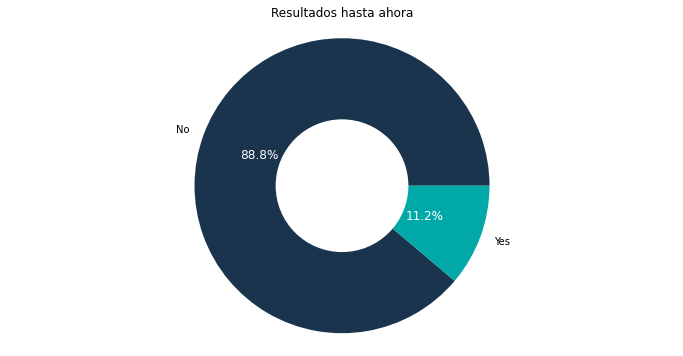

In [18]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect="equal"))

sizes = [len(df[(df.y == 'no')]), len(df[(df.y == 'yes')])]

labels = ['No', 'Yes']
colors = ['#1b344d',"#00a8a8"]
explode = (0, 0)
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%')

plt.setp(autotexts, size=12, color='white')

centre_circle = plt.Circle((0,0), 0.45, fc='white')
fig.gca().add_artist(centre_circle)
plt.axis('equal')

ax.set_title("Resultados hasta ahora")
ax.xaxis.labelpad = 20

plt.show()

## Atributo: Job

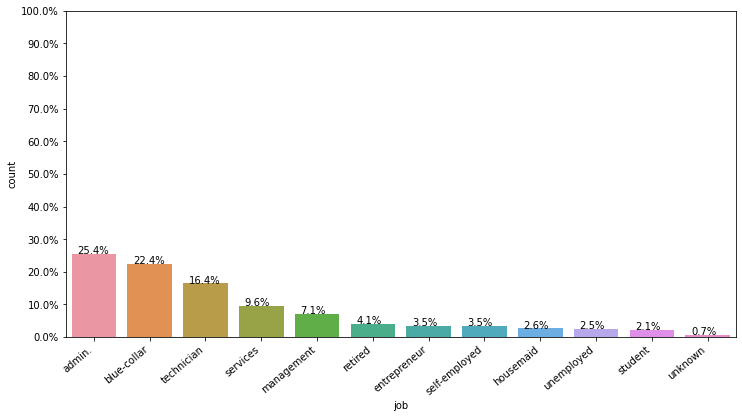

In [19]:
countplot('job', df)

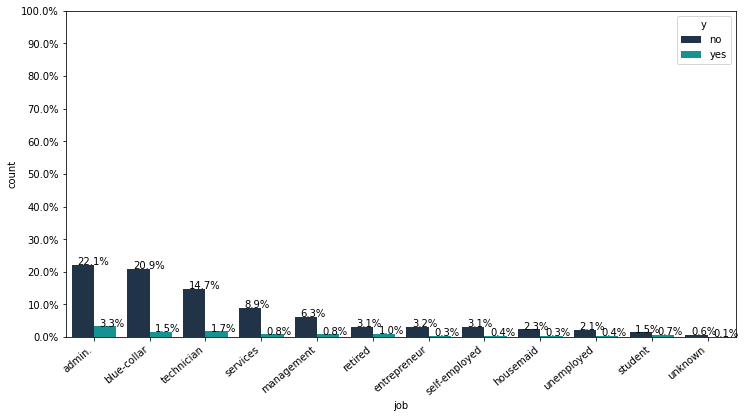

In [20]:
countplot_withY('job', df)

## Atributo: Marital

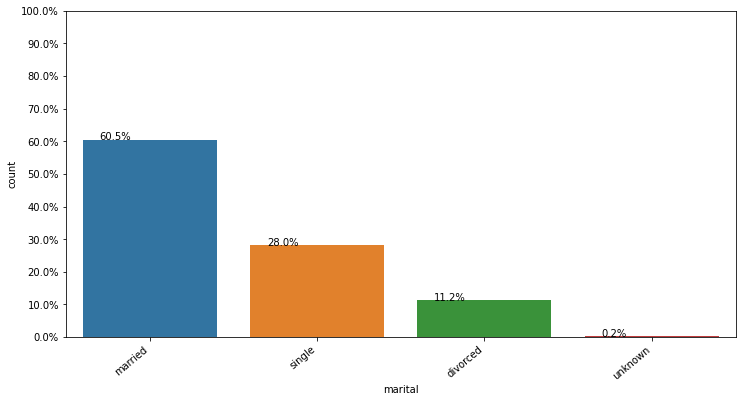

In [21]:
countplot('marital', df)

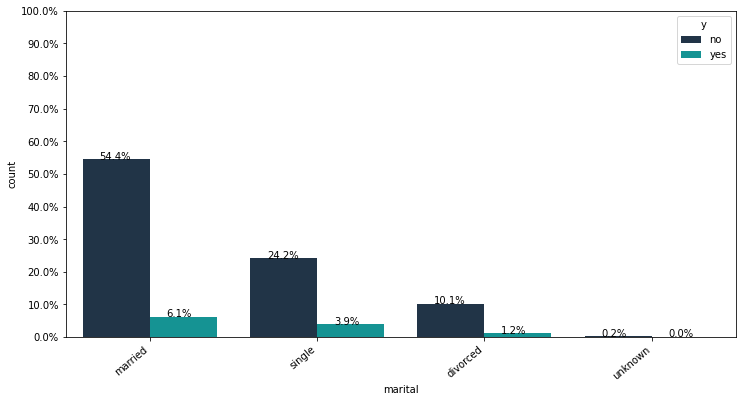

In [22]:
countplot_withY('marital', df)

## Atributo: Default

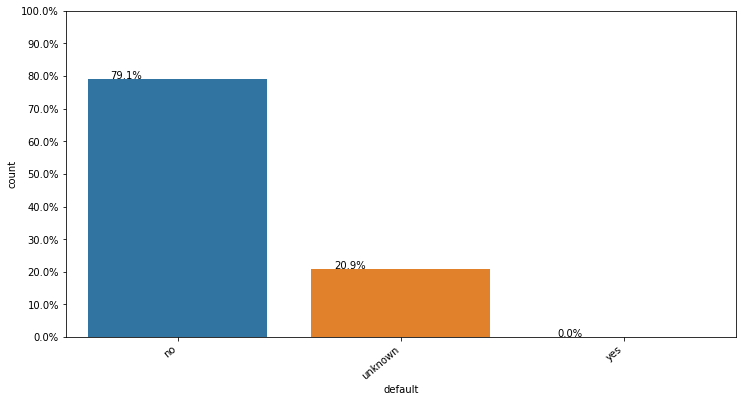

In [23]:
countplot('default', df)

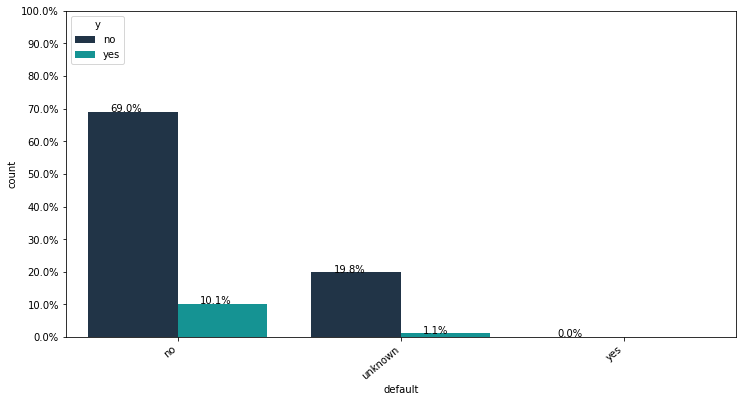

In [14]:
countplot_withY('default', df)

## Atributo: Education

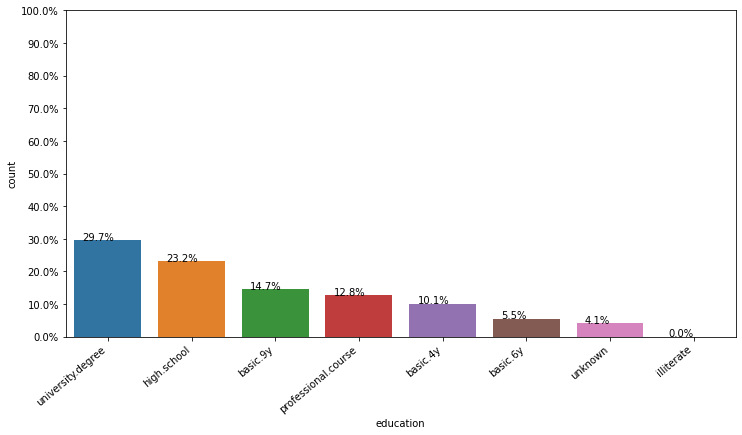

In [24]:
countplot('education', df)

La mayor parte de los clientes tienen una educación liceal o superior.

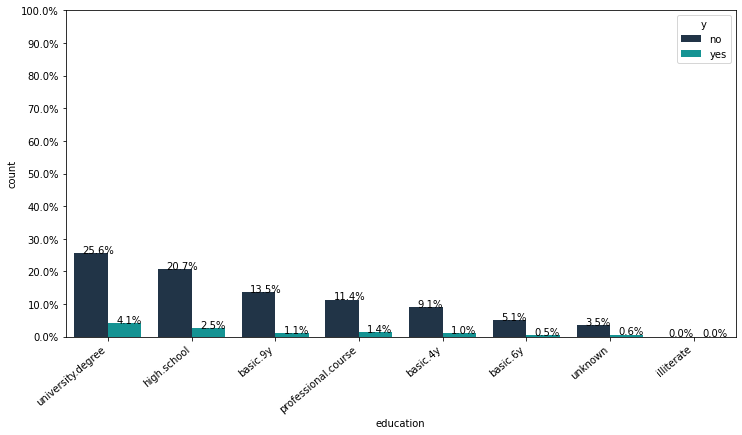

In [25]:
countplot_withY('education', df)

Dentro de los distintos niveles de educación, aquellos que tienen grado universitario son los que presentan un mayor porcentaje de "Si" en depósito a plazo fijo de un año. A su vez, son los que presentan mayor porcentaje de "No", debido a que la mayor parte d elos clientes presenta educación universitaria.

## Atributo: Edad

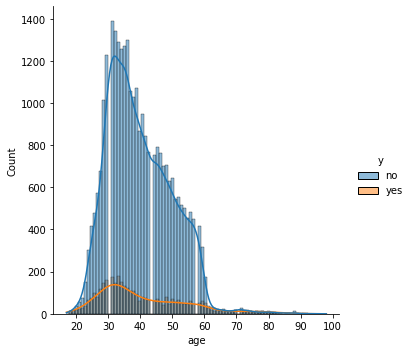

In [26]:
sns.displot(df, x="age", hue = 'y', kde = True)

In [27]:
age_list = df['age'].value_counts(ascending = True)
for item in age_list.items():
    print(item)

(94, 1)
(98, 1)
(87, 1)
(17, 2)
(91, 2)
(89, 2)
(92, 3)
(84, 6)
(86, 8)
(83, 11)
(85, 12)
(82, 14)
(79, 14)
(77, 14)
(81, 16)
(88, 17)
(75, 20)
(78, 22)
(67, 22)
(18, 23)
(72, 25)
(69, 25)
(68, 25)
(80, 25)
(73, 28)
(76, 28)
(74, 29)
(65, 32)
(19, 35)
(70, 37)
(64, 39)
(63, 44)
(71, 44)
(66, 45)
(62, 50)
(20, 55)
(61, 65)
(21, 79)
(22, 104)
(23, 191)
(60, 226)
(24, 367)
(59, 377)
(58, 467)
(25, 491)
(57, 495)
(55, 499)
(56, 547)
(54, 552)
(53, 568)
(26, 575)
(51, 604)
(52, 618)
(27, 653)
(49, 677)
(50, 713)
(47, 743)
(48, 788)
(28, 796)
(44, 814)
(46, 823)
(43, 835)
(45, 862)
(42, 916)
(40, 932)
(41, 1031)
(38, 1136)
(29, 1162)
(39, 1164)
(37, 1165)
(30, 1388)
(34, 1404)
(35, 1405)
(36, 1421)
(33, 1466)
(32, 1492)
(31, 1562)


La mayor parte de los clientes estan en el rango de los 29 - 41 años.

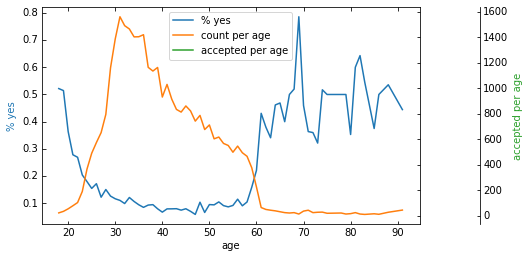

In [28]:
ages = df['age'].unique()
accepted = []
count_ages = []
accepted_per = []
for age in ages:
    count = df[(df['age'] == age)].count()
    yeses = df[(df['age'] == age) & (df['y'] == 'yes')].count()
    if count[0] > 10:
        accepted.append(yeses[0])
        count_ages.append(count[0])
        accepted_per.append(yeses[0]/count[0]) 

ages, accepted, count_ages, accepted_per = zip(*sorted(zip(ages, accepted, count_ages, accepted_per)))

df3 = pd.DataFrame({"accepted": accepted, "ages": ages, "count": count_ages, "accepted_per": accepted_per })

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=1)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par1,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlabel("age")
host.set_ylabel("% yes")
par2.set_ylabel("count per age")
par1.set_ylabel("accepted per age")

p1, = host.plot(df3['ages'], df3['accepted_per'], label="% yes")
p2, = par1.plot(df3['ages'], df3['count'], label="count per age")
p3, = par2.plot(df3['ages'], df3['accepted'], label="accepted per age")


host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

host.legend(loc='upper center')

plt.draw()
plt.show()

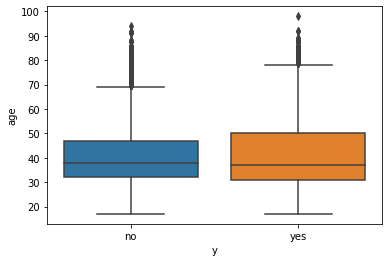

In [29]:
%matplotlib inline
sns.boxplot(data=df, x='y', y='age')
plt.show()

## Atributo: Duration

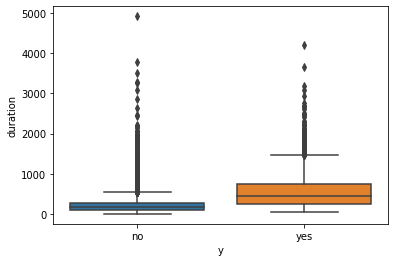

In [30]:
%matplotlib inline
sns.boxplot(data=df, x='y', y='duration')
plt.show()

Parece ser que la duración es una variable que influye fuertemente en la decisión de realizar o no un depósito a plazo fijo.

<Figure size 720x576 with 0 Axes>

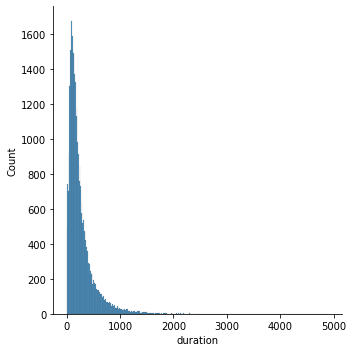

In [31]:
plt.figure(figsize=(10,8))
sns.displot(df.duration)

## Atributo: Variacion del empleo

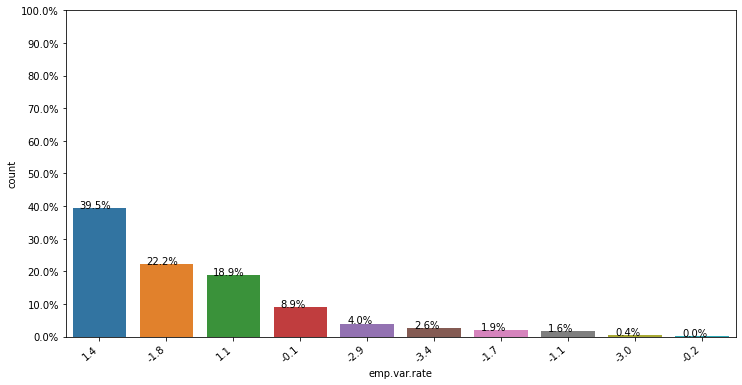

In [32]:
countplot('emp.var.rate', df)

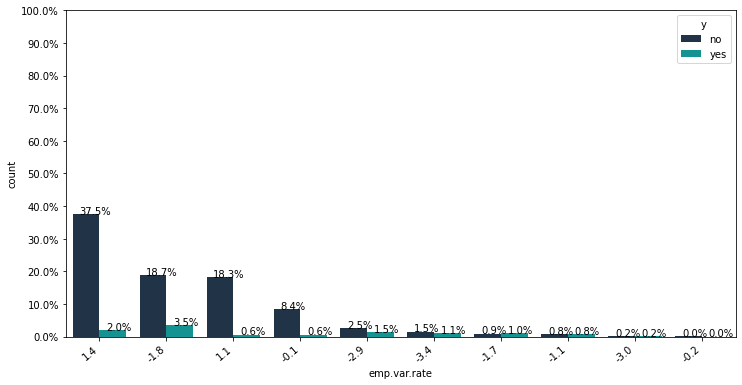

In [23]:
countplot_withY('emp.var.rate', df)

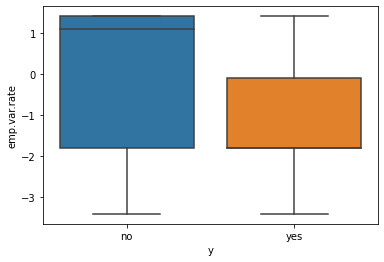

In [33]:
sns.boxplot(data=df, x='y', y='emp.var.rate')
plt.show()

## Atributo: Precios al consumidor

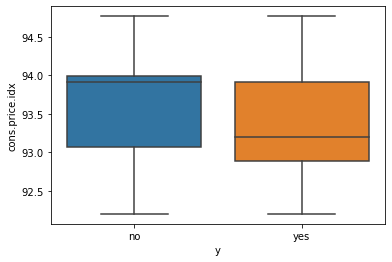

In [34]:
%matplotlib inline
sns.boxplot(data=df, x="y", y="cons.price.idx")
plt.show()

<Figure size 720x576 with 0 Axes>

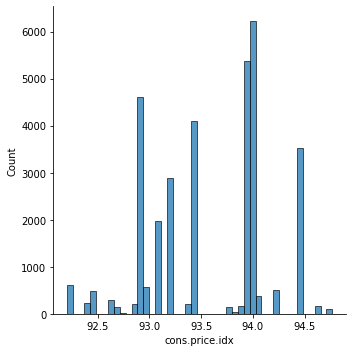

In [35]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.displot(df["cons.price.idx"])
plt.show()

## Atributo: Euribor a 3 meses

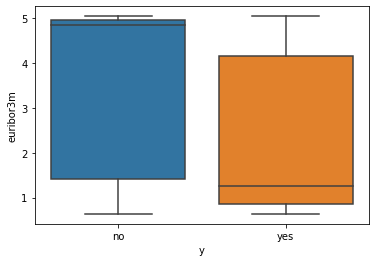

In [36]:
%matplotlib inline
sns.boxplot(data=df, x="y", y="euribor3m")
plt.show()

Si bien los cuartiles no difieren tanto, la mediana de euribor3m para los clientes que realizaron depósito a plazo fijo d eun año está entre 1 y 2, mientras que la de los que no está más cerca de 5. 

<Figure size 720x576 with 0 Axes>

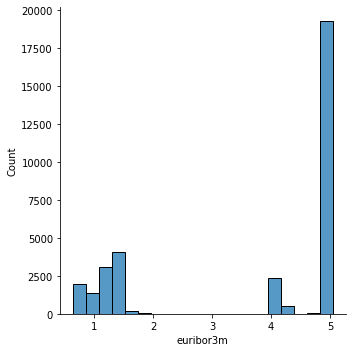

In [37]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.displot(df["euribor3m"])
plt.show()

Sin embargo, son muchos más los valores de euribor3m en 5 que en cualquiera de los otros valores.

## Atributo: Confianza del consumidor

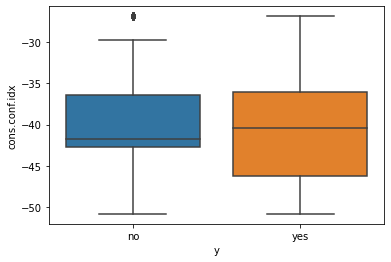

In [38]:
%matplotlib inline
sns.boxplot(data=df, x="y", y="cons.conf.idx")
plt.show()

<Figure size 720x576 with 0 Axes>

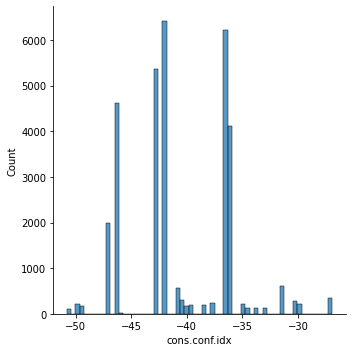

In [36]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.displot(df["cons.conf.idx"])
plt.show()

##  Atributo: Cantidad de dias desde el último contacto con cliente de campaña anterior

<Figure size 720x576 with 0 Axes>

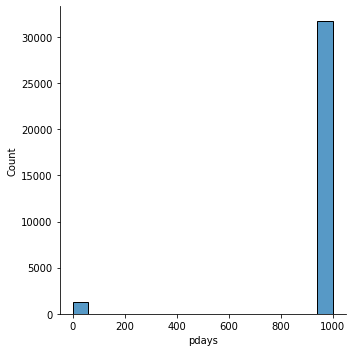

In [39]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.displot(df["pdays"])
plt.show()

In [40]:
df["pdays"].value_counts()

999    31723
3        360
6        336
4         93
9         52
2         50
7         49
12        48
5         43
10        39
13        28
1         21
11        21
15        16
14        15
8         15
0         11
16         8
17         6
18         5
19         3
21         2
22         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

La mayor parte de los clientes no han recibido una campaña previa, debido a que han pasado 999 días desde el último contacto del banco.

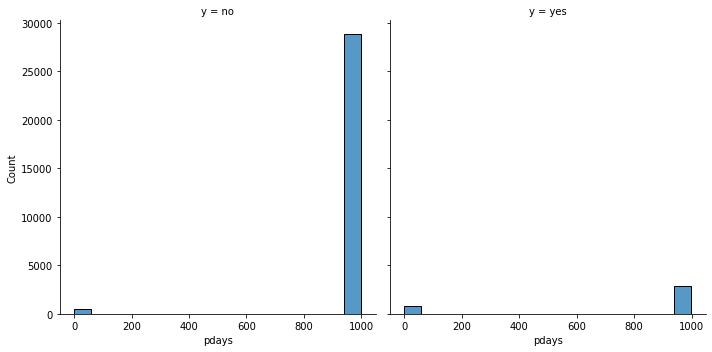

In [41]:
sns.displot(data=df, x="pdays", col="y")

## Atributo: Préstamo para vivienda

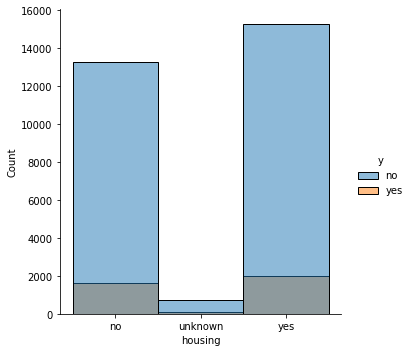

In [56]:
sns.displot(df, x="housing", hue = 'y')

El préstamo para vivienda no forma una diferencia significativa dentro de las personas que sí realizaron depósito a plazo fijo.

## Atributo: Crédito en mora 

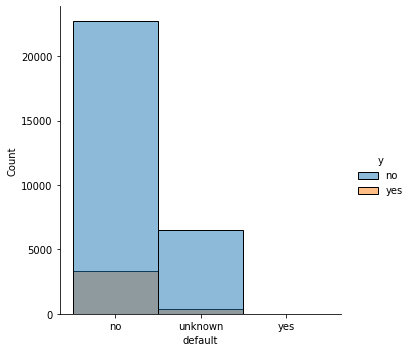

In [57]:
sns.displot(df, x="default", hue = 'y')

Dentro de aquellos que sí realizaron depósito fijo, la mayor parte no tiene crédito en mora.

## Atributo: Préstamo personal 

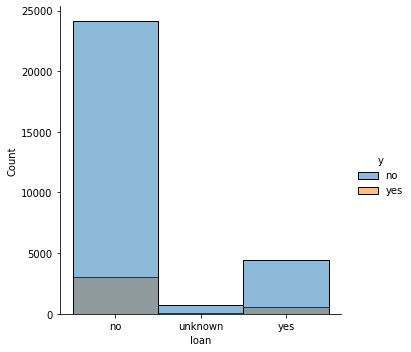

In [58]:
sns.displot(df, x="loan", hue = 'y')

Dentro de las personas que sí realizaron depósito, la mayor parte no tiene préstamo personal.  
Sin embargo, estas tres categorías no parecen ser muy significativas, de hecho, parece ser que el comportamiento es igual para quienes realizan o no depósito a plazo fijo. Esto es en parte a que los datos están desbalanceados.

## Correlacion entre las variables

Text(0.5, 1.05, 'Correlacion de Spearman')

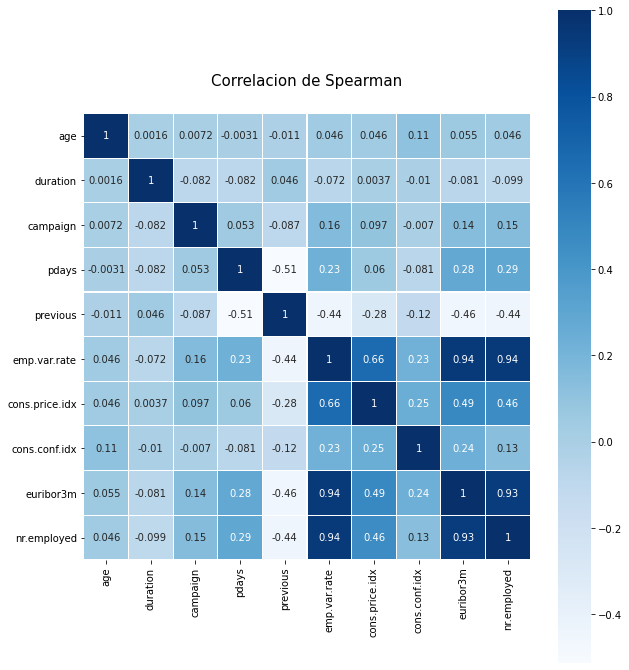

In [42]:
%matplotlib inline
corr = df.corr(method='spearman')

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="Blues", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Correlacion de Spearman", y=1.05, size=15)

Text(0.5, 1.05, 'Correlacion de Spearman')

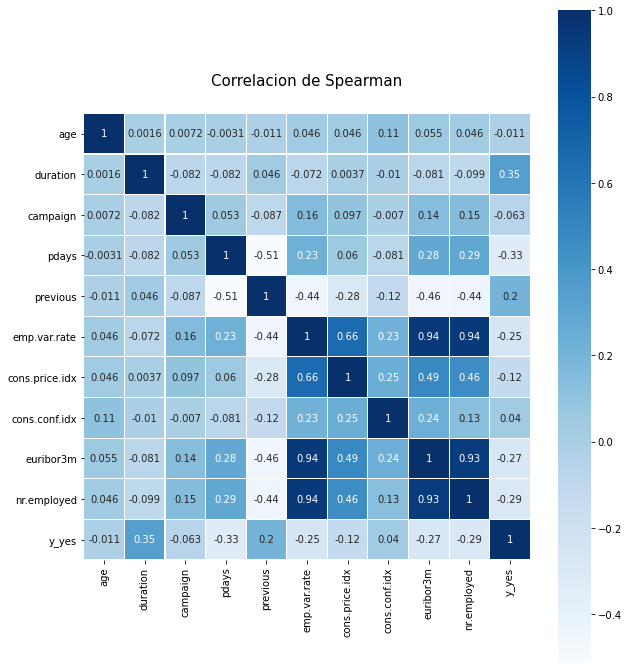

In [43]:
%matplotlib inline

df_corr = df.copy()
y_one = pd.get_dummies(df_corr.y, prefix='y', drop_first=True)
df_corr[y_one.columns] = y_one

corr = df_corr.corr(method='spearman')

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="Blues", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Correlacion de Spearman", y=1.05, size=15)

## Relacion entre el metodo de contacto y la variable objetivo

In [103]:
cel_yes = df[(df['contact'] == 'cellular') & (df['y'] == 'yes')].contact.count()
cel_no = df[(df['contact'] == 'cellular') & (df['y'] == 'no')].contact.count()
tel_yes = df[(df['contact'] == 'telephone') & (df['y'] == 'yes')].contact.count()
tel_no = df[(df['contact'] == 'telephone') & (df['y'] == 'no')].contact.count()

print('Cel that said yes:\t', cel_yes)
print('Cel that said no:\t', cel_no)
print('\n% Cel yes over total:\t', "{:.2f}".format((cel_yes / (cel_yes + cel_no))*100))
print('\nTel that said yes:\t', tel_yes)
print('Tel that said no:\t', tel_no)
print('\n% tel yes over total:\t', "{:.2f}".format((tel_yes / (tel_yes + tel_no))*100))

Cel that said yes:	 3076
Cel that said no:	 17804

% Cel yes over total:	 14.73

Tel that said yes:	 605
Tel that said no:	 11457

% tel yes over total:	 5.02


# Limpieza de datos

In [100]:
data_dup = df[df.duplicated(keep="last")]
data_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1124,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
3766,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
6069,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
6685,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
10673,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
11009,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
11425,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
25929,71,retired,single,university.degree,no,no,no,telephone,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no


In [44]:
df = df.drop_duplicates()
df.shape

(32942, 21)

# Creacion de atributos

## One hot encoding para las variables categoricas

In [45]:
df2 = df.copy()
job_one = pd.get_dummies(df2.job, prefix='job')
df2[job_one.columns] = job_one
marital_one = pd.get_dummies(df2.marital, prefix='marital')
df2[marital_one.columns] = marital_one
default_one = pd.get_dummies(df2.default, prefix='default')
df2[default_one.columns] = default_one
housing_one = pd.get_dummies(df2.housing, prefix='housing')
df2[housing_one.columns] = housing_one
loan_one = pd.get_dummies(df2.loan, prefix='loan')
df2[loan_one.columns] = loan_one
edu_one = pd.get_dummies(df2.education, prefix='education')
df2[edu_one.columns] = edu_one
contact_one = pd.get_dummies(df2.contact, prefix='contact')
df2[contact_one.columns] = contact_one
y_one = pd.get_dummies(df2.y, prefix='y')
df2[y_one.columns] = y_one
df2 = df2.drop(['job', 'marital', 'default', 'housing', 'loan', 'education', 'contact', 'y'], axis=1)
print(df2.head(1))

   age month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   31   jul         tue       555         2    999         0  nonexistent   

   emp.var.rate  cons.price.idx  ...  education_basic.9y  \
0           1.4          93.918  ...                   0   

   education_high.school  education_illiterate  education_professional.course  \
0                      0                     0                              0   

   education_university.degree  education_unknown  contact_cellular  \
0                            1                  0                 1   

   contact_telephone  y_no  y_yes  
0                  0     1      0  

[1 rows x 50 columns]


# Creacion de modelos

## Cross validation para el dataset original

In [46]:
X, y = df.iloc[:,0:len(df.columns) - 1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=27)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26353, 20)
(6589, 20)
(26353,)
(6589,)


## Cross validation para el dataset con one hot encoding

In [47]:
X_one, y_one = df2.iloc[:,8:len(df2.columns)-1], df2.iloc[:,-1]
X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(X_one, y_one, train_size=0.8, random_state=27)
print(X_train_one.shape)
print(X_test_one.shape)
print(y_train_one.shape)
print(y_test_one.shape)

(26353, 41)
(6589, 41)
(26353,)
(6589,)


## Arbol de decision

1.0


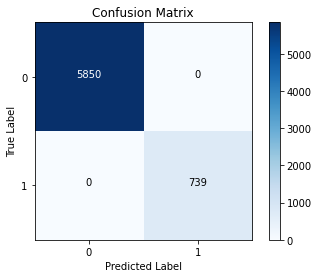

In [48]:
d_tree = tree.DecisionTreeClassifier()
d_tree_train = d_tree.fit(X_train_one, y_train_one)
y_pred = d_tree_train.predict(X_test_one)

print(d_tree.score(X_test_one, y_test_one))

def show_cm(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    if model_name:
        plt.title('Confusion Matrix: {}'.format(model_name))
    else:
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
    if class_names:
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    else:
        class_names = set(y_true)
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        thresh = cf.max() / 2.0
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j],
        horizontalalignment='center',
        color='white' if cf[i, j] > thresh else 'black',)
    plt.colorbar()
    
show_cm(y_test_one, y_pred)

## Regresion Logistica

In [52]:
# Eliminando columnas innecesarias
df2 = df.copy()
job_one = pd.get_dummies(df2.job, prefix='job', drop_first=True)
df2[job_one.columns] = job_one
marital_one = pd.get_dummies(df2.marital, prefix='marital', drop_first=True)
df2[marital_one.columns] = marital_one
default_one = pd.get_dummies(df2.default, prefix='default', drop_first=True)
df2[default_one.columns] = default_one
housing_one = pd.get_dummies(df2.housing, prefix='housing', drop_first=True)
df2[housing_one.columns] = housing_one
loan_one = pd.get_dummies(df2.loan, prefix='loan', drop_first=True)
df2[loan_one.columns] = loan_one
edu_one = pd.get_dummies(df2.education, prefix='education', drop_first=True)
df2[edu_one.columns] = edu_one
contact_one = pd.get_dummies(df2.contact, prefix='contact', drop_first=True)
df2[contact_one.columns] = contact_one
y_one = pd.get_dummies(df2.y, prefix='y', drop_first=True)
df2[y_one.columns] = y_one
df2 = df2.drop(['job', 'marital', 'default', 'housing', 'loan', 'education', 'contact', 'y'], axis=1)

In [50]:
model = LogisticRegression(class_weight='balanced', max_iter=300)
model.fit(X_train_one, y_train_one)
y_pred = model.predict_proba(X_test_one)

print("AUC score with duration column: ", roc_auc_score(y_test_one, y_pred[:,1]))

AUC score with duration column:  1.0


## KNN

In [51]:
k = [x for x in range(1, 17, 2)]
roauc_scores = []
for i in k:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train_one, y_train_one)
    cal_model = CalibratedClassifierCV(knn_model, method='sigmoid')
    cal_model.fit(X_train_one, y_train_one)
    y_pred = cal_model.predict_proba(X_test_one)
    roauc_scores.append(roc_auc_score(y_test_one, y_pred[:,1]))
for i in range(len(roauc_scores)):
    print(f'AUC for k = {k[i]} is {roauc_scores[i]}')

best_k = np.argmax(roauc_scores)

knn_model = KNeighborsClassifier(n_neighbors=k[best_k])
knn_model.fit(X_train_one, y_train_one)
cal_model = CalibratedClassifierCV(knn_model, method='sigmoid')
cal_model.fit(X_train_one, y_train_one)
y_pred = cal_model.predict_proba(X_test_one)

print(f'\nMejor resultado:\nAUC para mejor k = {k[best_k]} es {roc_auc_score(y_test_one, y_pred[:,1])}')

AUC for k = 1 is 0.9097499508460266
AUC for k = 3 is 0.9430429200929877
AUC for k = 5 is 0.9531257300810749
AUC for k = 7 is 0.9578401165816591
AUC for k = 9 is 0.9581423267756148
AUC for k = 11 is 0.9601444548535212
AUC for k = 13 is 0.9607672646102956
AUC for k = 15 is 0.9611608433665269

Mejor resultado:
AUC para mejor k = 15 es 0.9611608433665269


# Resultados y conclusiones